# Problem Set 1 (40 points) -   Take-Home

You have been tasked to implement a predictor that will _rank_ documents according to their relevancy to a given query.

You will use the [LETOR 4.0 dataset MQ2007]( https://arxiv.org/pdf/1306.2597.pdf) that has already been downloaded and is available in the `data` folder.

Each row is a query-document pair. The first column is the relevance label of this pair, the second column is query id, the following columns are features, and the end of the row is comment about the pair, including id of the document. The larger the relevance label, the more relevant the query-document pair. A query-document pair is represented by a 46-dimensional feature vector.

## PS1.A (5 points) - Data Exploration

Create a pandas frame of the dataset and _print_ the first 5 rows in format where the first row will show the column names of the dataset. Instead of the feature names you can conveniently use the column index as a name.  

Is the 2nd column which is the query id a feature or not ?  Answer the question by coding the production of the $\mathbf x$ feature container and the $label y$ label container.  

In [109]:
# Due to the state of the provided dataset, we will utilize Python file
# processing to extract the column names for the dataframe
col_names = []
inFile = open("Querylevelnorm.txt", "r")
line = inFile.readline()
words = line.split()
# We must keep in mind...
# 1) features are in the format "featureName:value"
# 2) columns after the features are in the form "columnName = value"
for i in range(len(words) - 1):
  word = words[i]
  if ":" in word:
    col_names.append(word.split(":")[0])
  elif words[i + 1] == "=":
    col_names.append(word)
col_names.insert(0, "relevance_label")
print(col_names)

['relevance_label', 'qid', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '#docid', 'inc', 'prob']


In [110]:
# Now, we must process the document to remove all the column names from the
# data values to easily load them into a dataframe.
# We will iterate through the text file, extracting only the values and
# placing them into a csv file that we create.
inFile = open("Querylevelnorm.txt", "r")
outFile = open("data.csv", "w")
for line in inFile:
  words = line.split()
  newLine = ""
  for word in words:
    if ":" in word:
      newLine += word.split(":")[1] + ","
    elif word.isalpha() or word.startswith("#") or word == "=":
      continue
    else:
      newLine += word + ","
  newLine = newLine[:-1] + "\n"
  outFile.write(newLine)

In [111]:
# After this, we can easily insert the formatted data into a Pandas DataFrame
import pandas as pd
df = pd.read_csv("data.csv", names=col_names)
print(df.head())

   relevance_label  qid         1         2     3         4         5    6  \
0                0   10  0.000000  0.000000  0.00  0.000000  0.000000  0.0   
1                1   10  0.031310  0.666667  0.50  0.166667  0.033206  0.0   
2                1   10  0.078682  0.166667  0.50  0.333333  0.080022  0.0   
3                1   10  0.019058  1.000000  1.00  0.500000  0.022591  0.0   
4                0   10  0.039477  0.000000  0.75  0.166667  0.040555  0.0   

     7    8  ...        40        41        42        43        44        45  \
0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.017241  0.000000  0.000000   
1  0.0  0.0  ...  0.750092  0.385426  0.923077  0.086207  0.333333  0.448276   
2  0.0  0.0  ...  0.641385  0.010462  0.076923  0.074713  0.833333  0.678161   
3  0.0  0.0  ...  0.863460  0.016642  0.153846  0.040230  0.833333  0.896552   
4  0.0  0.0  ...  0.646567  0.073711  0.076923  0.034483  0.333333  0.218391   

    46             #docid       inc      prob  
0 

In [112]:
# As per my understanding of this dataset, the 46 features describe the document.
# Meanwhile, the qid describes the query.
# In order to generate the relevance label to determine how relevant the document is
# to the query, we need the 46 features and the query id, so query id is a feature.
# We will drop the irrelvant columns
df.drop(["#docid", "inc", "prob"], axis="columns", inplace=True)

In [113]:
# Updated dataframe
print(df.head())

   relevance_label  qid         1         2     3         4         5    6  \
0                0   10  0.000000  0.000000  0.00  0.000000  0.000000  0.0   
1                1   10  0.031310  0.666667  0.50  0.166667  0.033206  0.0   
2                1   10  0.078682  0.166667  0.50  0.333333  0.080022  0.0   
3                1   10  0.019058  1.000000  1.00  0.500000  0.022591  0.0   
4                0   10  0.039477  0.000000  0.75  0.166667  0.040555  0.0   

     7    8  ...        37        38        39        40        41        42  \
0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.0  0.0  ...  0.646890  0.686107  0.823908  0.750092  0.385426  0.923077   
2  0.0  0.0  ...  0.649824  0.578581  0.868557  0.641385  0.010462  0.076923   
3  0.0  0.0  ...  0.918403  0.868457  1.000000  0.863460  0.016642  0.153846   
4  0.0  0.0  ...  0.565875  0.569440  0.769845  0.646567  0.073711  0.076923   

         43        44        45   46  
0  0.017241

In [114]:
# Generating X features container and labely container
import numpy as np
X = np.array(df.loc[:, df.columns != "relevance_label"])
labely = np.array(df["relevance_label"])
print(X, labely, sep="\n\n")

[[1.00000e+01 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00000e+01 3.13100e-02 6.66667e-01 ... 3.33333e-01 4.48276e-01
  0.00000e+00]
 [1.00000e+01 7.86820e-02 1.66667e-01 ... 8.33333e-01 6.78161e-01
  0.00000e+00]
 ...
 [9.99900e+03 8.97933e-01 3.33333e-01 ... 3.07692e-01 2.68966e-01
  0.00000e+00]
 [9.99900e+03 1.00000e+00 1.00000e+00 ... 1.53846e-01 1.58621e-01
  0.00000e+00]
 [9.99900e+03 7.91990e-01 3.33333e-01 ... 3.07692e-01 2.55172e-01
  0.00000e+00]]

[0 1 1 ... 1 1 1]


## PS1.B (20 points)

Consult your textbook notebook `#4`` (the one that corresponds to Chapter 4) and express the problem of ranking as a regression problem. State the problem and implement the solution using the polynomial basis functions just like in [this notebook](https://pantelis.github.io/data-mining/aiml-common/lectures/regression/linear-regression/linear_regression.html). Solve the linear regression problem using SGD. Report the train and test MSE as a function of the epochs.


In [115]:
# The problem is to utilize the features and query id to generate a relevance
# label to see how relvant a document is to a query.
# Here, we split the data into training and testing and train the SGD Linear
# Regression model, calculating the MSE for the train and test data for each epoch.
# Note: Regularization is turned off for this model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, labely, test_size=0.25)
model = SGDRegressor(loss="squared_error", penalty=None)
epochs = []
train_mse_arr = []
test_mse_arr = []
for epoch in range(1000):
  model.partial_fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  epochs.append(epoch)
  train_mse_arr.append(train_mse)
  test_mse_arr.append(test_mse)

Text(0, 0.5, 'Test MSE')

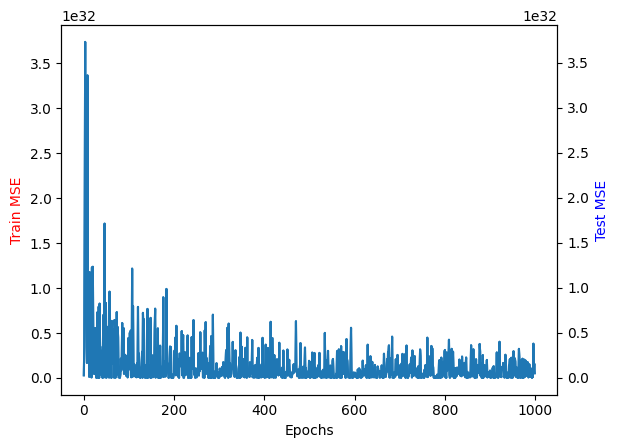

In [116]:
# Here, we plot the train and test MSE as a function of the epoch
# There does not appear to be two lines, but this is simply because the
# train and test mse are very similar in magnitude upon each iteration of
# SGD. The performance of SGD is not as good as the normal LinearRegression model
# which has much lower MSE.
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, train_mse_arr)
ax2.plot(epochs, test_mse_arr)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Train MSE", color="r")
ax2.set_ylabel("Test MSE", color="b")

## PS1.C (15 points)

Repeat the exercise of PS 1.B with the additional regualrization approach of  [this notebook](https://pantelis.github.io/data-mining/aiml-common/lectures/regression/linear-regression/linear_regression.html). Optimize $\lambda$ showing the train and test MSE as a function of this hyperparameter and for the optimal value of $\lambda$ plot the final train and test MSE as a function of the epochs.

In [123]:
# We can add in regularization by changing the penalty and
# alpha hyperparameters of the model.
# Rather than using a library like optuna to optimize the
# regularization hyperparameter, I will iterate over a reasonable range
# calculating the train and test MSE for those hyperparameter values
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_mse_arr = []
test_mse_arr = []
for i in alphas:
  model = SGDRegressor(loss="squared_error", penalty="l2", alpha=i)
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_mse_arr.append(train_mse)
  test_mse_arr.append(test_mse)

Text(0, 0.5, 'Test MSE')

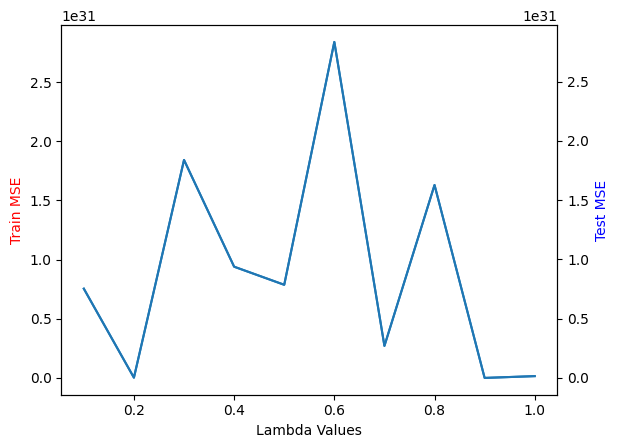

In [124]:
# Here, we plot the train and test MSE as a function of the different
# hyperparameter values
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alphas, train_mse_arr)
ax2.plot(alphas, test_mse_arr)
ax1.set_xlabel("Lambda Values")
ax1.set_ylabel("Train MSE", color="r")
ax2.set_ylabel("Test MSE", color="b")

In [125]:
# Finding minimum hyperparameter value
a = alphas[test_mse_arr.index(min(test_mse_arr))]
print(a)

0.9


In [126]:
# We will again plot the train and test MSE as a function of epochs (same code as Part B)
model = SGDRegressor(loss="squared_error", penalty="l2", alpha=a)
epochs = []
train_mse_arr = []
test_mse_arr = []
for epoch in range(1000):
  model.partial_fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  epochs.append(epoch)
  train_mse_arr.append(train_mse)
  test_mse_arr.append(test_mse)

Text(0, 0.5, 'Test MSE')

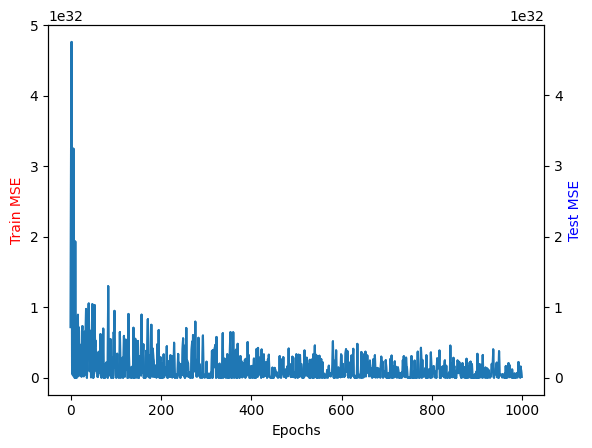

In [127]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epochs, train_mse_arr)
ax2.plot(epochs, test_mse_arr)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Train MSE", color="r")
ax2.set_ylabel("Test MSE", color="b")